# Divide and Conquer

In [18]:
import time
import random
from random import randint
import sys

import matplotlib.pyplot as plt
%matplotlib inline  

# 下面的程序用这个函数随机生成数组
def generate_random_array(n):
    return [randint(1, 3 * n) for e in range(n)]

**我们已经见过的Divide and Conquer相关的问题：**

- Binary Search 二分查找
- Merge Sort    归并排序
- Quick Sort    快速排序

The divide-and-conquer strategy solves a problem by:
1. Breaking it into subproblems that are themselves smaller instances of the same type of problem
2. Recursively solving these subproblems
3. Appropriately combining their answers

The real work is done piecemeal, in three different places: 
- in the partitioning of problems into subproblems; 
- at the very tail end of the recursion, when the subproblems are so small that they are solved outright; 
- and in the gluing together of partial answers.

These are held together and coordinated by the algorithm’s core recursive structure.

In this lecture, you will learn:

<a href='#Ex1'>Ex.1 Find Medium / Find kth Element</a>  查找中值 / 查找第 K 个元素

<a href='#Ex2'>Ex.2 Fast Power</a>  快速计算指数 x 的 n 次幂

<a href='#Ex3'>Ex.3 Search Peak Element</a>  搜索任意一个峰值

<a href='#Ex4'>Ex.4 Find index of an extra element present in one sorted array</a>  在已排序数组中找到多余元素的索引

<a href='#Ex5'>Ex.5 Maximum Sum Subarray</a>  加和值最大的子序列

<a href='#Ex6'>Ex.6 Count Inversions</a>  计算逆序对

### <a id='Ex1'>Ex.1: Find Medium / Find kth Element</a>   查找中值 / 查找第 K 个元素

See Document.

注意这两个题目其实是同一个问题：在求K个元素的函数中将 K=len(nums)//2 就可以用来求中值

In [19]:
# 解法 1：直接先排序，在找中值 or 第 K 个元素
# O(nlgn) time
def findKthLargest1(nums, k):
    start = time.time()
    rst = sorted(nums, reverse=True)   # 先排序
    t = time.time() - start
    return rst[k-1], len(rst), t

In [20]:
numbers = generate_random_array(6)
print(numbers)
m = findKthLargest1(numbers, len(numbers)//2)  # k = len(nums)//2
m

[6, 9, 14, 13, 10, 6]


(10, 6, 5.4836273193359375e-06)

In [22]:
random_lists = [generate_random_array(1000 * n) for n in range(1, 21)]

In [23]:
rst = [findKthLargest1(l, len(l)//2) for l in random_lists]
rst

[(1509, 1000, 0.0002624988555908203),
 (3015, 2000, 0.0005817413330078125),
 (4421, 3000, 0.0008306503295898438),
 (6215, 4000, 0.0012798309326171875),
 (7282, 5000, 0.0014445781707763672),
 (8703, 6000, 0.0057964324951171875),
 (10523, 7000, 0.002281665802001953),
 (12031, 8000, 0.002464771270751953),
 (13551, 9000, 0.0028772354125976562),
 (14743, 10000, 0.0031440258026123047),
 (16559, 11000, 0.003491640090942383),
 (18162, 12000, 0.00395512580871582),
 (19444, 13000, 0.004330635070800781),
 (20877, 14000, 0.004650115966796875),
 (22377, 15000, 0.00503849983215332),
 (24176, 16000, 0.006037712097167969),
 (25382, 17000, 0.006587982177734375),
 (27398, 18000, 0.007607221603393555),
 (28443, 19000, 0.007085561752319336),
 (30175, 20000, 0.007677555084228516)]

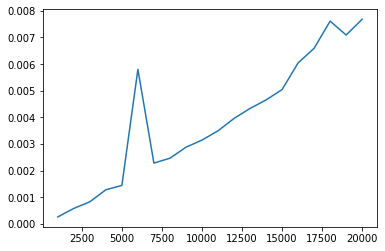

In [24]:
x = list(zip(*rst))[1]
y = list(zip(*rst))[2]

plt.plot(x, y)  # 解法 1 时间复杂度

In [25]:
# 解法 2：冒泡排序
# O(nk) time, bubble sort idea, TLE
def findKthLargest2(nums, k):
    start = time.time()
    for i in range(k):
        for j in range(len(nums)-i-1):
            if nums[j] > nums[j+1]:
                nums[j], nums[j+1] = nums[j+1], nums[j]  # exchange elements, time consuming
    t = time.time() - start
    return nums[len(nums)-k], len(nums), t

In [26]:
rst = [findKthLargest2(l, len(random_lists)//2) for l in random_lists]
rst

[(2967, 1000, 0.002607107162475586),
 (5981, 2000, 0.009798526763916016),
 (8956, 3000, 0.007230520248413086),
 (11983, 4000, 0.009639501571655273),
 (14981, 5000, 0.0124053955078125),
 (17948, 6000, 0.015862226486206055),
 (20984, 7000, 0.019772768020629883),
 (23961, 8000, 0.022253036499023438),
 (26956, 9000, 0.02754831314086914),
 (29978, 10000, 0.027291297912597656),
 (32972, 11000, 0.02968764305114746),
 (35985, 12000, 0.031311988830566406),
 (38973, 13000, 0.03423762321472168),
 (41973, 14000, 0.03766036033630371),
 (44971, 15000, 0.0397646427154541),
 (47958, 16000, 0.040908098220825195),
 (50982, 17000, 0.04537701606750488),
 (53971, 18000, 0.04758000373840332),
 (56968, 19000, 0.052535295486450195),
 (59968, 20000, 0.0552825927734375)]

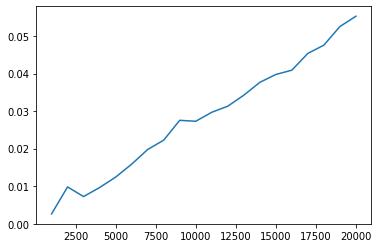

In [27]:
x = list(zip(*rst))[1]
y = list(zip(*rst))[2]

plt.plot(x, y)  # 解法 2 时间复杂度

In [32]:
# O(n) time, quick selection
def findKthLargest(lis, k):
    # convert the kth largest to smallest
    start = time.time()
    rst = findKthSmallest(lis, len(lis)+1-k)  # 这里是为了计算时间复杂度，自己写的时候可以不用这样写，直接写下面的函数
    t = time.time() - start
    return rst, len(lis), t
    
# 解法 3：分治法 每次 k 都与 base 比较，以此选择下一个子分区 （最优解）
# O(n) time, quick selection
def findKthSmallest(lis, k):
    if lis:
        # print("---\nlis: ", lis)
        sorted_pivot = partition(lis, 0, len(lis)-1)    # 进行一轮快排
        # print("lis: ", lis)
        # print("sorted_pivot: ", sorted_pivot)
        # 选择分区 继续递归
        if (sorted_pivot + 1) > k:                          # k 是 sorted_pivot + 1 前面的位置
            return findKthSmallest(lis[:sorted_pivot], k)   # 到前面去找
        elif (sorted_pivot + 1) < k:                        # k 是 sorted_pivot + 1 后面的位置
            # k-(sorted_pivot+1): 此时 lis 变成从 sorted_pivot+1 开始，索引要找的位置也要减去 sorted_pivot+1
            return findKthSmallest(lis[sorted_pivot+1:], k-(sorted_pivot+1) ) # 到后面去找
        else:
            return lis[sorted_pivot]

# choose the right-most element as pivot
# lis 快速排序
# 选取最右边的数作为 base, 返回一轮快排过后 base 所排的位置(那个位置为分界，前面是比它小的，后面是比它大的)
def partition(lis, left, right):
    pivot = left
    while left < right:
        if lis[left] < lis[right]:
            lis[left], lis[pivot] = lis[pivot], lis[left]
            pivot += 1    # 排在 pivot 前面的都是比 lis[pivot] 小的原来的 lis[left]
        left += 1
    lis[pivot], lis[right] = lis[right], lis[pivot]
    return pivot

In [33]:
numbers = generate_random_array(6)
print(numbers)
m = findKthLargest(numbers, len(numbers)//2)
m

[9, 2, 10, 11, 11, 5]


(10, 6, 9.059906005859375e-06)

In [ ]:
rst = [findKthLargest(l, len(random_lists)//2) for l in random_lists]
rst

In [ ]:
x = list(zip(*rst))[1]
y = list(zip(*rst))[2]

plt.plot(x, y)

In [ ]:
l = generate_random_array(1000000)

In [ ]:
r = findKthLargest1(l, len(l)//2)
r

In [ ]:
r = findKthLargest(l, len(l)//2)
r

### <a id='Ex2'>Ex.2: Fast Power 快速计算指数 x 的 n 次幂</a>

In [36]:
# flaw:有问题的程序 没有考虑 n 为负数的情况
def fast_power_flaw(x, n):
    if n <= 0:
        return 1
    elif n == 1:
        return x
    # 奇数偶数判断
    if n % 2:
        return fast_power_flaw(x * x, n // 2) * x   # 递归写法的好处：与思维思路比较接近； 缺点：会慢一些
    else:
        return fast_power_flaw(x * x, n // 2) 

In [39]:
print( fast_power_flaw(5, 2) )   # 25
print( fast_power_flaw(5, 0) )   # 1
print( fast_power_flaw(5, -2) )  # 1 flaw 没有考虑 n 为负数的情况
print( fast_power_flaw(0, 2) )   # 0
print( fast_power_flaw(0, 0) )   # 1 flaw
print( fast_power_flaw(0, -2) )  # 1 flaw

25
1
1
0
1
1


In [48]:
def fast_power(x, n):
    if x == 0:     # 这是自己加的，没有这个条件后面递归回来的时候会报错
        return 0
    if n == 0:
        return 1.0
    elif n < 0:     # n 为负数，返回其倒数
        return 1 / fast_power(x, -n)
    # 奇数偶数判断
    if n % 2:
        return fast_power(x * x, n // 2) * x
    else:
        return fast_power(x * x, n // 2)

In [49]:
print( fast_power(5, 2) )   # 25
print( fast_power(5, 0) )   # 1
print( fast_power(5, -2) )  # 1 flaw 没有考虑 n 为负数的情况
print( fast_power(0, 2) )   # 0
print( fast_power(0, 0) )   # 1 flaw
print( fast_power(0, -2) )  # 1 flaw

25.0
1.0
0.04
0
0
0


### <a id='Ex3'>Ex.3: Search Peak Element 搜索任意一个峰值</a>

The array has no duplicates, may contain multiple peaks, return the index to any one of the peaks.

数组没有重复值，但可能存在多个峰值，返回任意一个峰值的索引

You may imagine that num[-1] = num[n] = -∞. 

In [9]:
def search_peak(lis):
    return peak_helper(lis, 0, len(lis) - 1)

def peak_helper(lis, start, end):
    if start == end:    # 找到了
        return start
    
    if (start + 1 == end):  # left right 相邻，到最底层了
        if lis[start] > lis[end]:
            return start
        return end
    
    mid = (start + end) // 2
    if lis[mid] > lis[mid - 1] and lis[mid] > lis[mid + 1]: # 凸 峰值
        return mid
    if lis[mid - 1] > lis[mid] and lis[mid] > lis[mid + 1]: # 下降 到左半边找
        return peak_helper(lis, start, mid - 1)
    else:                                                   # 上升 or 凹(两边都可)
        return peak_helper(lis, mid + 1, end)

### <a id='Ex4'>Ex.4: Find index of an extra element present in one sorted array 在已排序数组中找到多余元素的索引</a>

Given two sorted arrays. 

There is only 1 difference between the arrays. First array has one element extra added in between. 

Find the *index* of the extra element.

给定两个已经排好序的数组。

这两个数组只有一个不同的地方：在第一个数组某个位置上多了一个元素，请找到这个元素的索引位置。

例:

Input : {2, 4, 6, 8, 9, 10, 12};
        {2, 4, 6, 8, 10, 12};
        
Output : 4

The first array has an extra element 9.

The extra element is present at index 4.

例:

Input :  {3, 5, 7, 9, 11, 13}
         {3, 5, 7, 11, 13}
         
Output :  3

In [50]:
## Returns index of extra element in arr1[].
# O(n*n) bad
def find_extra(arr1, arr2):
    for i in range(len(arr2)):
        if (arr1[i] != arr2[i]):
            return i
 
    return len(arr1)-1

In [56]:
# good 二分搜索
def find_extra_fast(arr1, arr2):
    idx = len(arr2)
    left, right = 0, len(arr2) - 1
    while (left <= right):
        mid = (left + right) // 2
        if (arr2[mid] == arr1[mid]):
            left = mid + 1  # 前半部分都相等 target 在后半部分
        else:
            idx = mid
            right = mid - 1 # target 在前半部分
    return idx

In [57]:
ar1 = [2, 4, 6, 8, 9, 10, 12]
ar2 = [2, 4, 6, 8, 10, 12]
print( find_extra_fast(ar1, ar2) )   # 4

ar1 = [3, 5, 7, 9, 11, 13]
ar2 = [3, 5, 7, 11, 13]
print( find_extra_fast(ar1, ar2) )   # 3

ar1 = [3, 5, 7, 9, 11, 13, 16]
ar2 = [3, 5, 7, 9, 11, 13]
print( find_extra_fast(ar1, ar2) )   # 6

ar1 = [1, 3, 5, 7, 9, 11, 13]
ar2 = [3, 5, 7, 9, 11, 13]
print( find_extra_fast(ar1, ar2) )   # 0

ar1 = [1]
ar2 = []
print( find_extra_fast(ar1, ar2) )   # 0

4
3
6
0
0


### <a id='Ex5'>Ex.5: Maximum Sum Subarray 加和值最大的子序列</a>

Find the sum of contiguous subarray within a one-dimensional array of numbers which has the largest sum.

在一个一位数组中找到连续的子序列，且这个子序列的加和值最大

例如：
num = [-2, 1, -3, 4, -1, 2, 1, -5, 4], 其最大加和值序列为 [4, -1, 2, 1], 其加和值为 6

<img src="../images/ch06/maxsubarraysum.png" width="320"/>


In [9]:
# O(n^2)
def subarray1(alist):
    result = -sys.maxsize
    for i in range(0, len(alist)):
        sum = 0
        for j in range (i, len(alist)):
            sum += alist[j]
            if sum > result:
                result = sum
    return result

In [9]:
alist = [-2,-3,4,-1,-2,1,5,-3]
subarray1(alist)

7

In [12]:
import sys

# O(nlgn) 经典解法，分治法
def subarray2(alist):
    return subarray2_helper(alist, 0, len(alist)-1)

def subarray2_helper(alist, left, right):
    if (left == right):
        return alist[left]
    mid = (left + right) // 2
    return max(subarray2_helper(alist, left, mid), 
               subarray2_helper(alist, mid+1, right), 
               maxcrossing(alist, left, mid, right))

def maxcrossing(alist, left, mid, right):
    sum = 0
    left_sum = -sys.maxsize
    for i in range (mid, left-1, -1):
        sum += alist[i]
        if (sum > left_sum):
            left_sum = sum
    sum = 0
    right_sum = -sys.maxsize
    for i in range (mid+1, right+1):
        sum += alist[i]
        if (sum > right_sum):
            right_sum = sum        
    return left_sum + right_sum


In [13]:
alist = [-2,-3,4,-1,-2,1,5,-3]
subarray2(alist)

7

In [16]:
# O(n) 动态规划
def subarray3(alist):
    result = -sys.maxsize
    local = 0
    for item in alist:
        local = max(item, local + item)
        result = max(result, local)
    return result

In [17]:
alist = [-2,-3,4,-1,-2,1,5,-3]
subarray3(alist)

7

### <a id='Ex6'>Ex.6: Count Inversions 计算逆序对</a>

**Define the number of inversion**

    i, j form an inversion if a[i] > a[j] for any i < j, that is, 
   if the two elements a[i] and a[j] are "out of order".


In [12]:
# O(n^2)
def countInv(arr):
    n = len(arr)
    inv_count = 0
    for i in range(n):
        for j in range(i+1, n):
            if (arr[i] > arr[j]):
                inv_count += 1
 
    return inv_count
 
arr = [1, 20, 6, 4, 5]
n = len(arr)
print("Number of inversions are", countInv(arr))

Number of inversions are 5


In [5]:
# ---------------------- 【 计算逆序对 】 -----------------------
# 【治】 合并 + 计算逆序对
def merge(left_part, right_part):     
    ret_lis = list()                    # 要返回的合并后的有序序列
    inv_count = 0                       # 逆序对的数量
    i, j = 0, 0                         # i,j 分别作为 left_part, right_part 的索引
    while i < len(left_part) and j < len(right_part):
        if left_part[i] < right_part[j]:
            ret_lis.append(left_part[i])
            i += 1
        elif left_part[i] > right_part[j]:
            ret_lis.append(right_part[j])
            j += 1
            inv_count += (len(left_part)-i)  # 逆序对 

    ret_lis += left_part[i:]
    ret_lis += right_part[j:]
    return ret_lis, inv_count

#归并排序的方法：分治
# O(nlgn)
def countInvFast(array):
    if len(array) < 2:                          #【分】 分分分分分 分到只剩一个
        return array, 0
    mid = len(array) // 2
    left_part, inv_left = countInvFast(array[:mid]) # mid 前半部分前部先递归然后出来
    right_part,inv_right = countInvFast(array[mid:])# 前半部分做完，每一层出来的时候做后半部分
    ret_lis, count = merge(left_part, right_part)   #【治】 合并 + 计算逆序对
    count += (inv_left + inv_right)
    return ret_lis, count

In [6]:
arr = [1, 20, 6, 4, 5]
n = len(arr)
print("Number of inversions are", countInvFast(arr))

Number of inversions are ([1, 4, 5, 6, 20], 5)
